In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
plt.style.use("ggplot")


## Loading the Datasets

In [4]:
df = pd.read_csv(r"D:\Work\Major Project - Final year\Data Sets - breast cancer\data.csv")

In [5]:
print(df)

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compa

In [6]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Data Pre-processing

We drop the data "id" and "Unnamed 32" as id is not helpfull at all for prediction of any kind and unNamed 32 has lots of NaN Values which will decrease the accuracy of my model 

In [7]:
df.drop(['id', 'Unnamed: 32'],axis = 1, inplace = True)

In [8]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

#### Diagnosis (M = malignant, B = bengin) we will label encoding (M=1,B=0)

In [9]:
df['diagnosis'] = df['diagnosis'].apply(lambda val:1 if val == 'M' else 0)

In [10]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [13]:
df.shape

(569, 31)

## Exploratory Data Analysis (EDA)

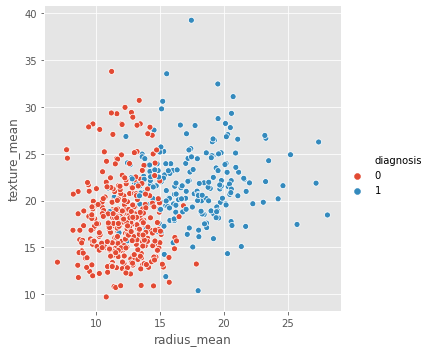

In [14]:
# Vareiable plot 
# SNS.RELPLOT is a function of seaborn library for the visualisation statsical relationships using 2 common approaches 
# Scatter plot and Line Plot.
# I had made this plot to find out the relationship between features and outcomes 

sns.relplot(x="radius_mean",y="texture_mean",hue="diagnosis",data=df)

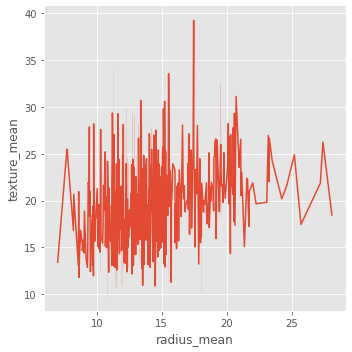

In [15]:
# Aggregation and representing uncertanity

sns.relplot(x='radius_mean',y='texture_mean',kind='line',data=df)

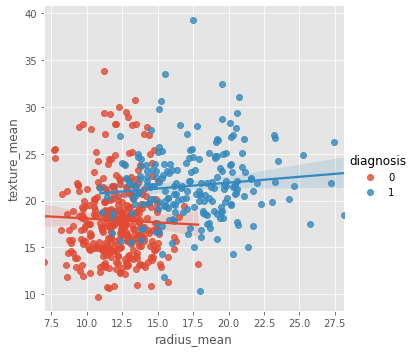

In [16]:
# Showing how does the relationship between two variable change as a function of a third variable 

sns.lmplot(x='radius_mean',y='texture_mean',hue='diagnosis',data=df)

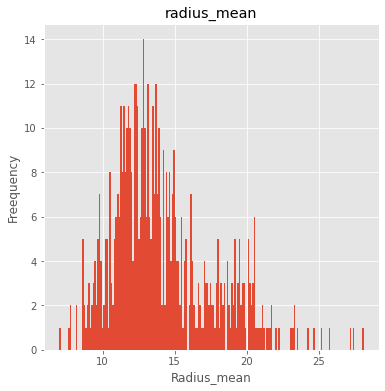

In [17]:
# histogram to see freequency distribution

df['radius_mean'].plot(kind='hist',bins = 200, figsize = (6,6))
plt.title('radius_mean')
plt.xlabel("Radius_mean")
plt.ylabel("Freequency")
plt.show()

### Swarm Plot

<AxesSubplot:xlabel='diagnosis', ylabel='radius_mean'>

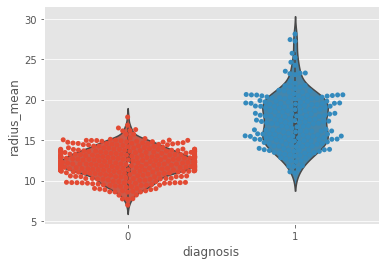

In [18]:
sns.violinplot(x="diagnosis",y="radius_mean",data=df)
sns.swarmplot(x="diagnosis",y="radius_mean",data=df)

### Pair Plotting


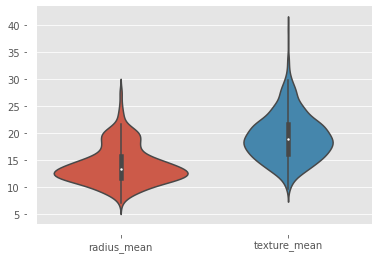

In [19]:
# Here we wwill check the outliners

f,ax=plt.subplots()
sns.violinplot(data=df.iloc[:,1:3])
sns.despine(offset = 10,trim = True)

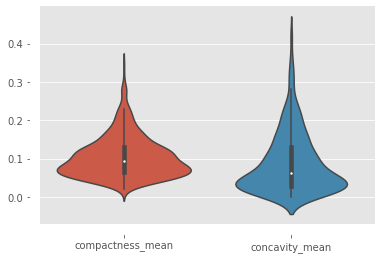

In [20]:
f, ax=plt.subplots()
sns.violinplot(data=df.iloc[:,6:8])
sns.despine(offset = 10,trim = True)

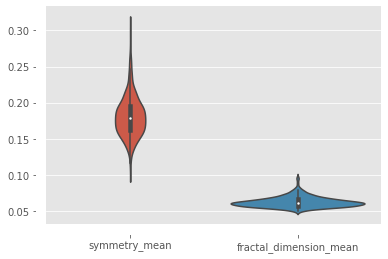

In [21]:
f,ax = plt.subplots()
sns.violinplot(data=df.iloc[:,9:11])
sns.despine(offset = 10,trim = True)

#### Below Plot will show clearly the data distribution and identify outliners 

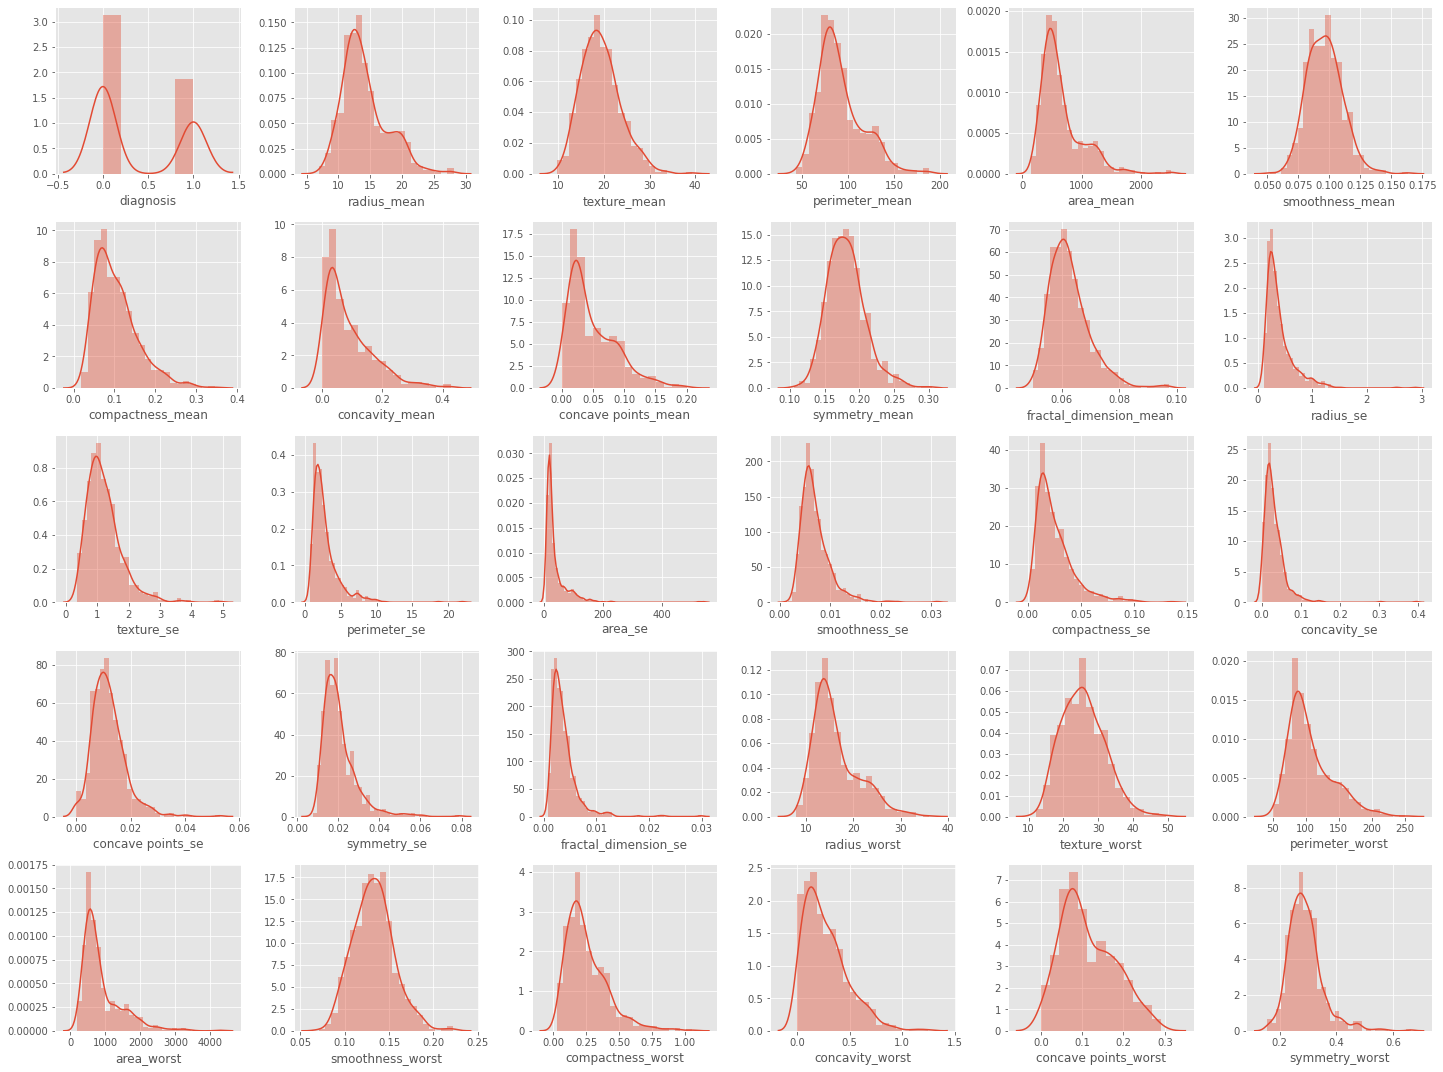

In [22]:
plt.figure(figsize = (20,15))
plotnumber = 1

for column in df:
    if plotnumber <= 30:
        ax = plt.subplot(5,6,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

## Heat map

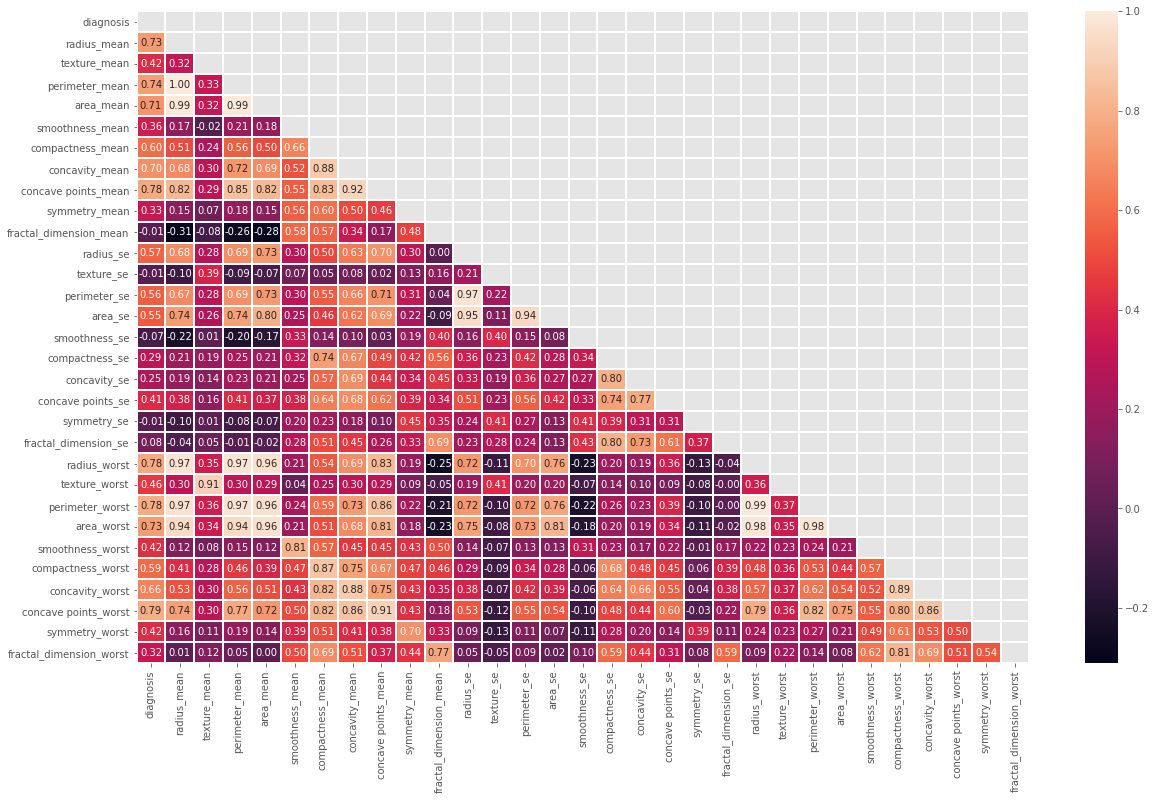

In [23]:
plt.figure(figsize=(20,12))

# df.corr() is themethod for correlation which is a measure of a mutual relationship between two variables 

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))  #Mask — takes a boolean array or a dataframe as an argument; when defined, 
                                                  #cells become invisible for values where the mask is True.

sns.heatmap(corr,mask = mask,linewidths = 1,annot = True,fmt='.2f')  #annot – an array of same shape as data which is used 
                                                                     #to annotate the heatmap
    
plt.show()

### Here in the above image dark red shows data is very highly correlated which causes multicollinearity so we have to remove highly correlated features

Why do we remove features of High Collinearity ?

Multi collinearity reduces the precision of the estimate coefficients , which weakens the statstical power of your regression modeland we might not be able to trust the p-values to identify independent variable 

P-Value:
The p-value for each term tests the null hypothesis that the coefficient is equal to zero (no effect). A low p-value (< 0.05) indicates that you can reject the null hypothesis. ... Typically, you use the coefficient p-values to determine which terms to keep in the regression model.

In [24]:
# Removing Highly correlated features

corr_matrix = df.corr().abs()

mask = np.triu(np.ones_like(corr_matrix,dtype = bool))
tri_df = corr_matrix.mask(mask)

to_drop = [x for x in tri_df.columns if any(tri_df[x] > 0.92)]  #Correlation value greater than 0.92 will be drop from df

df  = df.drop(to_drop,axis = 1)
print(f"Ther reduced dataframe has {df.shape[1]} columns.")

Ther reduced dataframe has 23 columns.


## Dealing with outliners

In [26]:
def mod_outliner(df):
    df1 = df.copy()
    df = df._get_numeric_data()
    
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    
    iqr = q3 - q1
    
    lower_bound = q1 -(1.5 * iqr)
    upper_bound = q3 +(1.5 * iqr)
    
    for col in df.columns:
        for i in range(0,len(df[col])):
            if df[col][i] < lower_bound[col]:
                df[col][i] = lower_bound[col]
                
            if df[col][i] > upper_bound[col]:
                df[col][i] = upper_bound[col]
            
            
        for col in df.columns:
            df1[col] = df[col]
        
        return(df1)

df = mod_outliner(df)

In [27]:
# creating features and  label

X = df.drop('diagnosis',axis = 1)
y = df["diagnosis"]

In [28]:
#Splitting the data into training and testing

from sklearn.model_selection import train_test_split

X_train , X_test,y_train,y_test = train_test_split(X, y, test_size=0.30, random_state=0)

### using Standard Scaler to scale the data 



In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Applying Logistic Regression 

In [30]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
# Model prediction

y_pred = log_reg.predict(X_test)

In [32]:
# accuracy score

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

print(accuracy_score(y_train,log_reg.predict(X_train)))

log_reg_acc = accuracy_score(y_test,log_reg.predict(X_test))
print(log_reg_acc)

0.9899497487437185
0.9590643274853801


In [33]:
print(confusion_matrix(y_test,y_pred))

[[106   2]
 [  5  58]]


In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       108
           1       0.97      0.92      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171

